# LIBOR futures and forecasting the Fed Funds rate

We examine the two key interest rates: LIBOR and Fed Funds. 
The former has a much greater depth in the futures market in terms of 
volume and maturity horizon, which implies richer information content. 
We will extrapolate an implied forward Fed Funds rate. 
This is useful in gauging market expectations regarding Fed policy.

The **30-day Federal Funds *futures* incorporates market expectations of the 
average *daily* Federal Funds Effective Rate (FFER) levels *during* a given contract month**. 
The FFER is published by the Federal Reserve Bank of New York each day, and is 
calculated as a transaction-volume weighted average of the previous day’s rates on 
trades arranged by major brokers for overnight unsecured loans between depository institutions. 
Trading of the futures contracts is considered thin, 
especially in the distant months, suitable more for speculation 
than risk management purposes.

In contrast, the **futures on LIBOR (CME Eurodollar contract)** has a 
tenor of 3-months with tremendous trading volume extending out for years. 
The LIBOR reference is the key interest rate for pricing 
floating-rate debt obligations in USD worldwide. 
Futures trading is precisely arbitraged with the enormous swap market. 
In 2014 assets linked to LIBOR were valued over \$300 trillion. 

Our implied forward Fed Funds *estimates* the expected average FFER 
at a given time in the future. 
This is measure is more meaningful than the 
probability of Fed rate hike currently in vogue, since it is a point estimate 
generated from a highly active futures market curve. 
A point estimate is also more useful for quantifying valuations 
than a single probability of a Fed action.

In conclusion, we shall sum up with one number to this simple 
question: **How much is the Fed Funds expected to change over the next 12 months?** 
and from that, likely Fed policy decisions.

2016-01-11 **Addendum: we distilled this notebook into one function *forefunds()* 
given in Appendix 3.** 
That function has been generalized to accept arguments further out than 12 months.

2016-12-23 **Major revision** using Appendix 3 as template whose 
derivation is documented in an older 
[notebook dated 2016-01-11](https://github.com/rsvp/fecon235/blob/v5.16.1107/nb/qdl-libor-fed-funds.ipynb). 
We clarify our presentation by explicitly stating our transposition and tenor assumptions.

REFERENCE: 

- John W. Labuszewski, *Understanding Eurodollar Futures*, https://www.cmegroup.com/trading/interest-rates/files/understanding-eurodollar-futures.pdf

- Scoring the Fed's *dual mandate*, https://git.io/fed -- economic conditions which motivate FOMC policy decisions.

Shortcut for this current notebook: https://git.io/fedfunds

*Dependencies:*

- Repository: https://github.com/rsvp/fecon235
- Python: matplotlib, pandas
     
*CHANGE LOG*

    2016-12-23  Major revision using transposition and tenor assumptions. 
                   Include 2016-12-14 Fed rate hike.
    2016-01-11  Fix issue #2 by v4 and p6 updates.
                   Include 2015-12-16 Fed rate hike.
                   Rollover from Dec to June futures cycle.
                   Deprecate ratio_av estimation.
                   Add Appendix 2 for forwards as predictors.
                   Add Appendix 3 for forefunds() summary.
    2015-11-02  Include October Fed no-change announcement.
    2015-09-22  Include post-FOMC meeting of 2015-09-17.
    2015-09-16  First version.

In [1]:
from fecon235.fecon235 import *

In [2]:
#  PREAMBLE-p6.15.1223 :: Settings and system details
from __future__ import absolute_import, print_function
system.specs()
pwd = system.getpwd()   # present working directory as variable.
print(" ::  $pwd:", pwd)
#  If a module is modified, automatically reload it:
%load_ext autoreload
%autoreload 2
#       Use 0 to disable this feature.

#  Notebook DISPLAY options:
#      Represent pandas DataFrames as text; not HTML representation:
import pandas as pd
pd.set_option( 'display.notebook_repr_html', False )
from IPython.display import HTML # useful for snippets
#  e.g. HTML('<iframe src=http://en.mobile.wikipedia.org/?useformat=mobile width=700 height=350></iframe>')
from IPython.display import Image 
#  e.g. Image(filename='holt-winters-equations.png', embed=True) # url= also works
from IPython.display import YouTubeVideo
#  e.g. YouTubeVideo('1j_HxD4iLn8', start='43', width=600, height=400)
from IPython.core import page
get_ipython().set_hook('show_in_pager', page.as_hook(page.display_page), 0)
#  Or equivalently in config file: "InteractiveShell.display_page = True", 
#  which will display results in secondary notebook pager frame in a cell.

#  Generate PLOTS inside notebook, "inline" generates static png:
%matplotlib inline   
#          "notebook" argument allows interactive zoom and resize.

 ::  Python 2.7.11
 ::  IPython 4.2.0
 ::  jupyter_core 4.1.0
 ::  notebook 4.1.0
 ::  matplotlib 1.5.1
 ::  numpy 1.10.4
 ::  pandas 0.18.0
 ::  pandas_datareader 0.2.1
 ::  Repository: fecon235 v5.16.1107 develop
 ::  Timestamp: 2016-12-25, 17:48:15 UTC
 ::  $pwd: /media/yaya/virt15h/virt/dbx/Dropbox/ipy/fecon235/nb


## FFER, Fed Funds Effective Rate

In this section, we cover the actual Fed Funds rate (not the futures contracts based on it).

In [3]:
#  Data source is FRED, Federal Reserve Bank of St. Louis:
ffer = get( d4ff )
#           ^Daily Fed Funds, effective rate

In [4]:
#  To see the raw FFER over the last year:
#  plot( tail( ffer, 256 ))

In [5]:
#  Fed Funds trading can be very erratic (sometimes jumping 200 bp in minutes), 
#  so we apply the 30-period exponential moving average:

ff30 = ema(ffer, 0.0645)

This series of exponential moving averages serves to 
simulate the *running spot rate* of the futures contracts on Fed Funds 
(per CME contract settlement specifications).

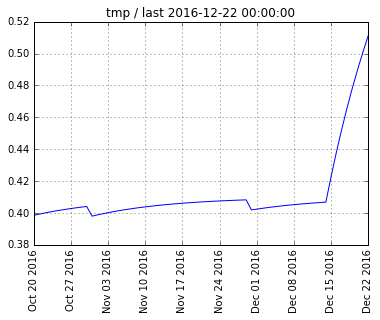

In [6]:
plot( tail(ff30, 64) )
#  Smoothed ffer 

2015-09-16  We can safely say that FFER has been trading around mid-range [0, 0.25] for the last year.

2015-11-02  FFER estimated at 12 bp currently (this is mid-target range).

2016-01-11  Smoothed FFER estimated at 28 bp.

2016-12-23  Fed rate hike of 2016-12-14 means we should expect FFER 
to trade in the [0.50, 0.75] range.


#### Tip: ff30 is directly accessible: ff30 = get( d4ff30 ) 

In [7]:
tail(ff30)

                   Y
T                   
2016-12-16  0.438434
2016-12-17  0.452725
2016-12-18  0.466094
2016-12-19  0.478601
2016-12-20  0.490301
2016-12-21  0.501247
2016-12-22  0.511486

## Set up LIBOR futures

In [8]:
#  SET UP symbols for the particular (f4) futures contracts:
s_libor  = 'f4libor17h'
s_libory = 'f4libor18h'

#  f4libor* refers to the CME Eurodollar futures. 
#  s_libory should be one year further out than s_libor.
#  h refers to March contract, m to June, u to Sep, z to Dec.

#  RE-RUN this entire study by merely changing the string symbols.

In [9]:
#  Retrieve futures data:
libor   = todf( 100 - get(s_libor) )
libory  = todf( 100 - get(s_libory) )
#               ^convert futures quotes to conventional % format

When we later take the difference between the two futures contracts 
we effectively strip out the credit risk involved with primary international banks, 
focusing purely on the yield differential across maturity.

Our implicit **transposition assumption** traverses the futures and swap markets: 

$ libory - libor \approx LIBOR\_1y\_forward - LIBOR\_day0 $

### Event log

2015-11-02  No press conference for October Fed announcement 
so no major changes were expected, and indeed there was 
no change in policy regarding Fed funds. Fed statement removed 
its concern about economic developments *abroad* and 
hinted possible rate hike in December.

2016-01-09  **The Fed had its first rate hike, in almost a decade, on 2015-12-16.** 
It was widely anticipated, and largely discounted in the markets. 
Although the hike was +25 bp, the response in the traded rate was only +7 bp.

2016-12-23  **Fed rate hike rate of +25 bp on 2016-12-14.** 
This means the range will be [0.50, 0.75]. Currently trading at 0.66%. 
The announcement included the FOMC expectation of *three further 
rate hikes* during the course of 2017.

## On rate hike probabilities and forecasting

The media is fond of releasing the probability of a rate hike based on Fed Funds futures, however, the assumptions behind the calculation are often dubious 
given that the Fed currently operates within a *range*:

- Zero to 25 bp range since 2008-12-16 
- Effective 2015-12-17: 25 to 50 bp
- Effective 2016-12-14: 50 to 75 bp

rather than a single target rate. 
Only the nearby Fed Funds futures is actively traded 
which means its importance to relative only to the next FOMC meeting.

Our technique gives point forecasts (rather than probabilities) 
on all horizons on which the Eurodollar futures trade.

As an example, we now estimate the expected 
Fed Funds effective rate, one year out. 

The key idea is to use the difference between expected LIBOR rates. 
We implicitly use the **tenor assumption**: 

$ (ffy - ff) \approx (ffy - ff30) \approx (LIBOR\_1y\_forward - LIBOR\_day0) $ 

which extrapolates the Fed Funds rate one-year forward *ffy* 
(such an instrument would actually be very uninteresting 
since the underlying duration is overnight) from 3-month LIBOR. 
Then for computational purposes we utilize the transposition assumption, hereby:

$ ffy \approx libory - libor + ff30 $

**Notice how the tenor and transpositions assumptions 
makes the use of Fed Fund *futures* unnecessary.** 

In [10]:
#  MAIN IDEA distilled...
#  Estimate Fed Funds one year out:

ffy = todf( libory - libor + ff30 )

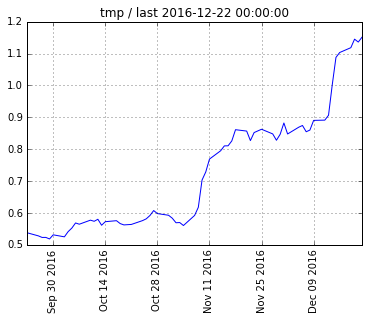

In [11]:
#  Fed Funds, implied 1-year forward rate:
plot( tail(ffy, 64) )

In [12]:
tail(ffy)

                   Y
2016-12-14  1.001828
2016-12-15  1.088157
2016-12-16  1.103434
2016-12-19  1.118601
2016-12-20  1.145301
2016-12-21  1.136247
2016-12-22  1.151486

## CONCLUSION: point forecast for Fed Funds

Let's address this simple question: **How much is the Fed Funds 
expected to change over the next 12 months?**

In [13]:
#  Should be equivalent to intra-LIBOR spread:
tailvalue( ffy ) - tailvalue( ff30 )

#  2015-09-16  Answer: +43 bp from current 14 bp effective rate, 
#                             so FFER est. at 0.57% in one year.
#
#  2015-09-22  Answer: +38 bp from current 14 bp effective rate,
#                             so FFER est. at 0.52% in one year.
#
#  2015-11-02  Answer: +38 bp from current 12 bp effective rate,
#                             so FFER est. at 0.50% in one year.
#
#  2016-01-11  Answer: +45 bp from current 28 bp effective rate,
#                             so FFER est. at 0.73% in one year.
#
#  2016-12-23  Answer: +64 bp from current 51 bp effective rate,
#                             so FFER est. at 1.15 in one year.

0.6400000000000006

2015-09-22  Currently our **point forecast for FFER one-year out is 0.52%**. Given our standard error computed above, this implies in terms of expected Fed action: one rate hike of 25 bp (keeping actual in the upper range) or two rate hikes of 25 bp (keeping actual in the lower [0.50, 0.75] range).

2015-11-02  **Point forecast for FFER one-year out is 0.50%**, thus no change in conclusion is warranted.

2016-01-11  Point forecast for FFER one-year out is 0.73%. **Given the 2015-12-16 rate hike, this implies in terms of expected Fed action: one further rate hike of 25 bp 
(keeping actual in the upper range), or two rate hikes of 25 bp 
(keeping actual in the lower [0.75, 1.00] range).**
Interestingly, the Fed's own blue dot plot seems to suggest 1.0% is reasonable in one year.

2016-12-23  Point forecast for FFER one-year out is 1.15%. **Given the 2016-12-14 rate hike, this implies in two further rate hikes of 25 bp each, then possibly a third 
(to trade mid-range) during the course of 2017.** 
Thus we can say the market is aligned with Fed's 2016-12-14 announced intention 
of three hikes during 2017.

- - -

## Appendix 1: [moved to FFER section above]

## Appendix 2: Forward rates as predictors

We have implicitly assumed in this notebook that rates which are 
traded forward in time are market predictions. But are they 
accurate predictors? This is will require a backtesting framework. 
It is fairly common to see this type of assumption tested 
in commodity and foreign exchange markets.

For now, we will just leave some visual evidence as a teaser. 
LIBOR forwards can be persistently wrong-headed, 
for example, see the 2009-2012 period below. 
The long end of the forward curve is dominated by 
the yield curve, but generally the short end does 
reflect news narratives of market expectations.

In [14]:
Image(url='http://bit.ly/libor-fwd_jpg', embed=False)

## Appendix 3: Forecasting Fed Funds, distilled

[Note regarding pre-2016-12-23 versions of this notebook: 
After data exploration and doing the "algebra" behind the 
individual computations, it is interesting to see that *what 
we suspected to be important can in fact be dropped as 
redundant: the synthetic Fed Funds futures.*]

From the smoothed Fed Funds effective rate, 
we can just simply add the differential between Libor forwards 
to arrive at our forecast. We distill the technique as *forefunds()* 
which shall be in the main fecon235.py module.

We can generalize the notebook logic to make forecasts 
long-term since Libor futures is very active 
extending out to distant contract years (unlike the Fed Funds futures).

In [15]:
forefunds??

Signature: forefunds(nearby='16m', distant='17m')
Source:
def forefunds( nearby='16m', distant='17m' ):
    '''Forecast distant Fed Funds rate using Eurodollar futures.'''
    #  Long derivation is given in qdl-libor-fed-funds.ipynb
    ffer = getfred('DFF')
    #      ^Retrieve Fed Funds effective rate, daily since 1954.
    ffer_ema = ema( ffer['1981':], 0.0645 )
    #                    ^Eurodollar futures debut.
    #          ^Exponentially Weighted Moving Average, 30-period.
    libor_nearby  = get( 'f4libor' + nearby  ) 
    libor_distant = get( 'f4libor' + distant )
    libor_spread = todf( libor_nearby - libor_distant )
    #     spread in forward style quote since futures uses 100-rate.
    return todf( ffer_ema + libor_spread )

File:      ~/Dropbox/ipy/fecon235/fecon235.py
Type:      function

In [16]:
#  Illustrate direct forefunds() usage by TEST example:

ffy_equivalent = forefunds( nearby=s_libor[-3:], distant=s_libory[-3:] )
#  That [-3:] is slicing of the last three parts of the string.

if abs(tailvalue(ffy) - tailvalue(ffy_equivalent)) < 0.005:
    print("TEST PASSED: forefunds() agrees with its notebook derivation.")
else:
    system.warn("TEST FAILED: forefunds() disagrees with its notebook derivation.")

TEST PASSED: forefunds() agrees with its notebook derivation.
